## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updati

50000/50000 [==============================] - 2s 41us/step - loss: 2.4626 - acc: 0.0970 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.4626 - acc: 0.0976 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.4626 - acc: 0.0981 - val_loss: 2.4626 - val_acc: 0.1000
Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (Non

50000/50000 [==============================] - 2s 41us/step - loss: 2.6759 - acc: 0.6284 - val_loss: 3.0360 - val_acc: 0.4986
Epoch 50/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.6337 - acc: 0.6328 - val_loss: 2.9079 - val_acc: 0.5344
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)

50000/50000 [==============================] - 2s 42us/step - loss: 0.8668 - acc: 0.6959 - val_loss: 1.3745 - val_acc: 0.5330
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________________________

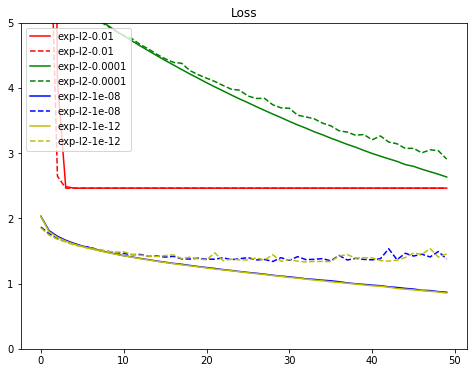

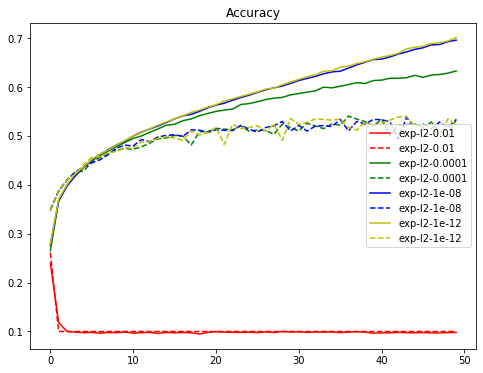

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-2,l2_ratio=1e-2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio,l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [16]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [17]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio1 in L1_EXP:
    for regulizer_ratio2 in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer = %.6f %.6f" % (regulizer_ratio1 , regulizer_ratio2))
        model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio1, l2_ratio=regulizer_ratio2)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 54us/step - loss: 198.7544 - acc: 0.2336 - val_loss: 41.0777 - val_acc: 0.2652
Epoch 2/50
50000/50000 [==============================] - 2s 43us/step - loss: 19.1030 - acc: 0.1158 - val_loss: 7.2648 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 4.0997 - acc: 0.1000 - val_loss: 2.6469 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.4860 - acc: 0.0979 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.4626 - acc: 0.0971 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4625 - val

50000/50000 [==============================] - 2s 48us/step - loss: 19.1887 - acc: 0.1169 - val_loss: 7.3223 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 4.1239 - acc: 0.1000 - val_loss: 2.6499 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.4863 - acc: 0.0981 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.4626 - acc: 0.0967 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.4626 - acc: 0.0965 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.4626 - acc: 0.0975 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 9/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 63us/step - loss: 4.1241 - acc: 0.0994 - val_loss: 2.6489 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.4864 - acc: 0.0970 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.4626 - acc: 0.0971 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.4626 - acc: 0.0967 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.4626 - acc: 0.0944 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.4626 - acc: 0.0996 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.4626 - acc: 0.0979 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 44us/step - loss: 12.1034 - acc: 0.3968 - val_loss: 11.2681 - val_acc: 0.4048
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 10.5342 - acc: 0.4046 - val_loss: 9.8273 - val_acc: 0.3998
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 9.1976 - acc: 0.4101 - val_loss: 8.5932 - val_acc: 0.4157
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 8.0586 - acc: 0.4173 - val_loss: 7.5454 - val_acc: 0.4194
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 7.0896 - acc: 0.4198 - val_loss: 6.6488 - val_acc: 0.4254
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 6.2637 - acc: 0.4245 - val_loss: 5.8932 - val_acc: 0.4287
Epoch 10/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.5592 - acc: 0.4297 - val_loss: 5.2415 - val_acc: 0.4304
Epoch 11/50
50000/50000 [=======================

50000/50000 [==============================] - 2s 49us/step - loss: 5.4580 - acc: 0.4279 - val_loss: 5.4089 - val_acc: 0.4360
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 5.3519 - acc: 0.4440 - val_loss: 5.3223 - val_acc: 0.4395
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 5.2511 - acc: 0.4540 - val_loss: 5.2056 - val_acc: 0.4531
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.1537 - acc: 0.4639 - val_loss: 5.1218 - val_acc: 0.4637
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.0622 - acc: 0.4737 - val_loss: 5.0461 - val_acc: 0.4698
Epoch 10/50
50000/50000 [==============================] - 2s 44us/step - loss: 4.9726 - acc: 0.4827 - val_loss: 4.9559 - val_acc: 0.4717
Epoch 11/50
50000/50000 [==============================] - 2s 47us/step - loss: 4.8862 - acc: 0.4896 - val_loss: 4.9061 - val_acc: 0.4671
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 2s 42us/step - loss: 5.2549 - acc: 0.4418 - val_loss: 5.2179 - val_acc: 0.4389
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 5.1582 - acc: 0.4530 - val_loss: 5.1222 - val_acc: 0.4489
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.0694 - acc: 0.4599 - val_loss: 5.0472 - val_acc: 0.4552
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 4.9812 - acc: 0.4721 - val_loss: 4.9685 - val_acc: 0.4532
Epoch 10/50
50000/50000 [==============================] - 2s 43us/step - loss: 4.8969 - acc: 0.4795 - val_loss: 4.8967 - val_acc: 0.4643
Epoch 11/50
50000/50000 [==============================] - 2s 42us/step - loss: 4.8144 - acc: 0.4864 - val_loss: 4.8146 - val_acc: 0.4725
Epoch 12/50
50000/50000 [==============================] - 2s 42us/step - loss: 4.7327 - acc: 0.4962 - val_loss: 4.7358 - val_acc: 0.4757
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 2s 47us/step - loss: 5.1427 - acc: 0.4551 - val_loss: 5.1092 - val_acc: 0.4540
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 5.0530 - acc: 0.4667 - val_loss: 5.0226 - val_acc: 0.4653
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 4.9668 - acc: 0.4732 - val_loss: 4.9555 - val_acc: 0.4621
Epoch 10/50
50000/50000 [==============================] - 2s 44us/step - loss: 4.8837 - acc: 0.4817 - val_loss: 4.8827 - val_acc: 0.4698
Epoch 11/50
50000/50000 [==============================] - 2s 45us/step - loss: 4.8037 - acc: 0.4885 - val_loss: 4.8048 - val_acc: 0.4748
Epoch 12/50
50000/50000 [==============================] - 2s 43us/step - loss: 4.7239 - acc: 0.4958 - val_loss: 4.7562 - val_acc: 0.4686
Epoch 13/50
50000/50000 [==============================] - 2s 44us/step - loss: 4.6465 - acc: 0.5019 - val_loss: 4.6638 - val_acc: 0.4816
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 2s 44us/step - loss: 6.0751 - acc: 0.4335 - val_loss: 5.7474 - val_acc: 0.4346
Epoch 9/50
50000/50000 [==============================] - 2s 45us/step - loss: 5.4423 - acc: 0.4386 - val_loss: 5.1632 - val_acc: 0.4348
Epoch 10/50
50000/50000 [==============================] - 2s 47us/step - loss: 4.9006 - acc: 0.4418 - val_loss: 4.6666 - val_acc: 0.4401
Epoch 11/50
50000/50000 [==============================] - 2s 47us/step - loss: 4.4374 - acc: 0.4472 - val_loss: 4.2432 - val_acc: 0.4368
Epoch 12/50
50000/50000 [==============================] - 2s 48us/step - loss: 4.0404 - acc: 0.4488 - val_loss: 3.8672 - val_acc: 0.4523
Epoch 13/50
50000/50000 [==============================] - 2s 49us/step - loss: 3.7008 - acc: 0.4557 - val_loss: 3.5574 - val_acc: 0.4497
Epoch 14/50
50000/50000 [==============================] - 3s 51us/step - loss: 3.4101 - acc: 0.4589 - val_loss: 3.2989 - val_acc: 0.4488
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 2s 43us/step - loss: 1.6293 - acc: 0.4768 - val_loss: 1.6538 - val_acc: 0.4651
Epoch 10/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6054 - acc: 0.4840 - val_loss: 1.6415 - val_acc: 0.4647
Epoch 11/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5819 - acc: 0.4934 - val_loss: 1.6121 - val_acc: 0.4783
Epoch 12/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5591 - acc: 0.5019 - val_loss: 1.6022 - val_acc: 0.4780
Epoch 13/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5365 - acc: 0.5098 - val_loss: 1.5872 - val_acc: 0.4812
Epoch 14/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5175 - acc: 0.5157 - val_loss: 1.5790 - val_acc: 0.4867
Epoch 15/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.4996 - acc: 0.5228 - val_loss: 1.5570 - val_acc: 0.4937
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 46us/step - loss: 1.4596 - acc: 0.4887 - val_loss: 1.4876 - val_acc: 0.4724
Epoch 11/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4343 - acc: 0.4980 - val_loss: 1.4766 - val_acc: 0.4780
Epoch 12/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4122 - acc: 0.5060 - val_loss: 1.4748 - val_acc: 0.4802
Epoch 13/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.3902 - acc: 0.5127 - val_loss: 1.4398 - val_acc: 0.4913
Epoch 14/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.3695 - acc: 0.5190 - val_loss: 1.4266 - val_acc: 0.4914
Epoch 15/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.3492 - acc: 0.5266 - val_loss: 1.4326 - val_acc: 0.4935
Epoch 16/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.3298 - acc: 0.5342 - val_loss: 1.4430 - val_acc: 0.4914
Epoch 17/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 47us/step - loss: 1.4411 - acc: 0.4939 - val_loss: 1.4900 - val_acc: 0.4736
Epoch 12/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4188 - acc: 0.5025 - val_loss: 1.4536 - val_acc: 0.4832
Epoch 13/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3949 - acc: 0.5093 - val_loss: 1.4448 - val_acc: 0.4873
Epoch 14/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3743 - acc: 0.5156 - val_loss: 1.4348 - val_acc: 0.4907
Epoch 15/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.3540 - acc: 0.5246 - val_loss: 1.4122 - val_acc: 0.4984
Epoch 16/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.3330 - acc: 0.5318 - val_loss: 1.4029 - val_acc: 0.5032
Epoch 17/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.3161 - acc: 0.5383 - val_loss: 1.4131 - val_acc: 0.4953
Epoch 18/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 43us/step - loss: 4.0541 - acc: 0.4489 - val_loss: 3.8830 - val_acc: 0.4455
Epoch 13/50
50000/50000 [==============================] - 2s 42us/step - loss: 3.7126 - acc: 0.4542 - val_loss: 3.5661 - val_acc: 0.4498
Epoch 14/50
50000/50000 [==============================] - 2s 44us/step - loss: 3.4206 - acc: 0.4577 - val_loss: 3.2954 - val_acc: 0.4525
Epoch 15/50
50000/50000 [==============================] - 2s 44us/step - loss: 3.1697 - acc: 0.4621 - val_loss: 3.0832 - val_acc: 0.4501
Epoch 16/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.9553 - acc: 0.4640 - val_loss: 2.8753 - val_acc: 0.4538
Epoch 17/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.7701 - acc: 0.4666 - val_loss: 2.7050 - val_acc: 0.4631
Epoch 18/50
50000/50000 [==============================] - 2s 43us/step - loss: 2.6127 - acc: 0.4699 - val_loss: 2.5807 - val_acc: 0.4514
Epoch 19/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 43us/step - loss: 1.5432 - acc: 0.5055 - val_loss: 1.5910 - val_acc: 0.4855
Epoch 14/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5226 - acc: 0.5134 - val_loss: 1.5872 - val_acc: 0.4882
Epoch 15/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5026 - acc: 0.5214 - val_loss: 1.5649 - val_acc: 0.4957
Epoch 16/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4855 - acc: 0.5268 - val_loss: 1.5636 - val_acc: 0.4932
Epoch 17/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4658 - acc: 0.5326 - val_loss: 1.5481 - val_acc: 0.5007
Epoch 18/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4492 - acc: 0.5391 - val_loss: 1.5413 - val_acc: 0.5012
Epoch 19/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4324 - acc: 0.5459 - val_loss: 1.5544 - val_acc: 0.4975
Epoch 20/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 50us/step - loss: 1.3819 - acc: 0.5138 - val_loss: 1.4488 - val_acc: 0.4889
Epoch 15/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3633 - acc: 0.5206 - val_loss: 1.4336 - val_acc: 0.4962
Epoch 16/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3446 - acc: 0.5277 - val_loss: 1.4257 - val_acc: 0.4941
Epoch 17/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3247 - acc: 0.5359 - val_loss: 1.4096 - val_acc: 0.5042
Epoch 18/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3077 - acc: 0.5389 - val_loss: 1.4129 - val_acc: 0.5014
Epoch 19/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2917 - acc: 0.5440 - val_loss: 1.4000 - val_acc: 0.5011
Epoch 20/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2738 - acc: 0.5493 - val_loss: 1.3907 - val_acc: 0.5059
Epoch 21/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 43us/step - loss: 1.3497 - acc: 0.5250 - val_loss: 1.4176 - val_acc: 0.5009
Epoch 16/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3301 - acc: 0.5317 - val_loss: 1.4128 - val_acc: 0.5003
Epoch 17/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3123 - acc: 0.5353 - val_loss: 1.4084 - val_acc: 0.5004
Epoch 18/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2934 - acc: 0.5450 - val_loss: 1.3923 - val_acc: 0.5009
Epoch 19/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2780 - acc: 0.5490 - val_loss: 1.3757 - val_acc: 0.5113
Epoch 20/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2632 - acc: 0.5553 - val_loss: 1.3775 - val_acc: 0.5114
Epoch 21/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.2485 - acc: 0.5604 - val_loss: 1.3522 - val_acc: 0.5228
Epoch 22/50
50000/50000 [=====================